<a href="https://colab.research.google.com/github/Armin-Abdollahi/Recurrent-Neural-Network/blob/main/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural networks in Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Preloading data using Keras

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_test.shape

(10000, 28, 28)

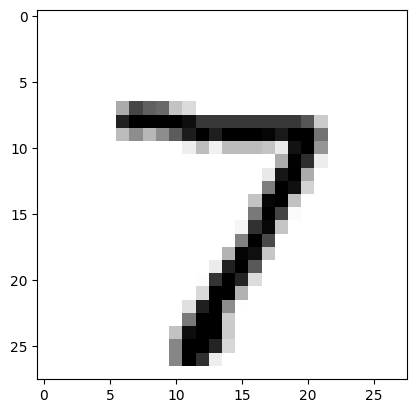

In [4]:
plt.imshow(x_test[0],cmap='gray_r')

In [5]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
#x_train[400]

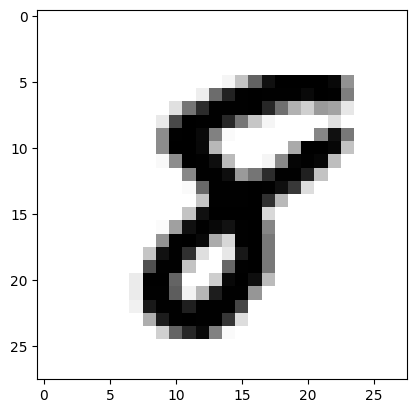

In [7]:
plt.imshow(x_train[777],cmap="binary")
plt.show()

In [8]:
print(y_train[777])

8


In [9]:
print(x_train.shape)

(60000, 28, 28)


Processing input data in a neural network

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test / 255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
x_train[0].shape

(28, 28)

In [13]:
x_train[0].flatten().shape

(784,)

In [14]:
x_train[0].reshape(784).shape

(784,)

In [15]:
500*800

400000

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
#FLATTEN

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [18]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [19]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
len(y_test[0])

10

In [22]:
print(y_train[3])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
print(y_train.shape)

(60000, 10)


In [24]:
print(y_test.shape)

(10000, 10)


Processing input data in a neural network

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(15, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 12045 (47.05 KB)
Trainable params: 12045 (47.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Setting up the learning process

In [27]:
model.compile(loss="CategoricalCrossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

Model training

In [28]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3065 - accuracy: 0.1087
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3014 - accuracy: 0.1123
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3014 - accuracy: 0.1123
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1123
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.30

Model evaluation

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2911 - accuracy: 0.1691


In [30]:
print('Test accuracy:', test_acc)

Test accuracy: 0.16910000145435333


In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step


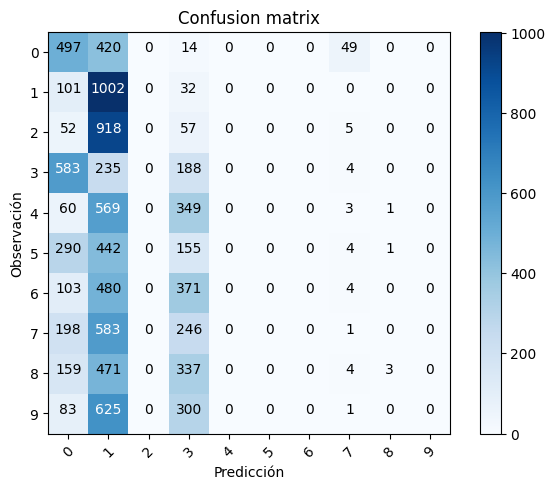

In [32]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10))

Generación de predicciones

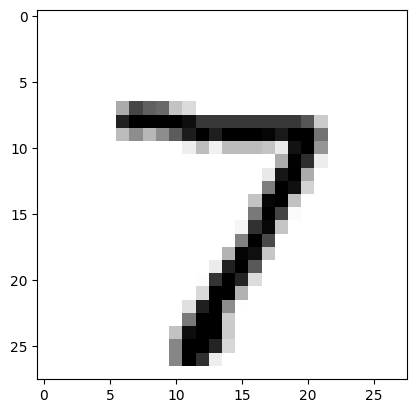

In [33]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[0], cmap=plt.cm.binary)

In [34]:
predictions = model.predict(x_test)
len(predictions)

313/313 [==============================] - 1s 2ms/step


10000

In [35]:
print(predictions[0])

[0.10813289 0.10666802 0.09580145 0.10521937 0.10037    0.08876286
 0.09622958 0.10415579 0.10068924 0.09397084]


In [36]:
np.argmax(predictions[0])

0

In [37]:
print(predictions[0])

[0.10813289 0.10666802 0.09580145 0.10521937 0.10037    0.08876286
 0.09622958 0.10415579 0.10068924 0.09397084]


In [38]:
np.sum(predictions[0])

1.0